In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\123sa\Desktop\train.csv", nrows = 5000000)
test = pd.read_csv(r"C:\Users\123sa\Desktop\test.csv")

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(5000000, 8)

# Data cleaning

In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [7]:
df.isnull().sum().sort_values(ascending=False)


dropoff_longitude    36
dropoff_latitude     36
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

In [10]:
df.shape

(4999964, 8)

In [11]:
df['fare_amount'].describe()

count    4.999964e+06
mean     1.134074e+01
std      9.820066e+00
min     -1.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [12]:
from collections import Counter
Counter(df['fare_amount']<0)

Counter({False: 4999753, True: 211})

In [13]:
df = df.drop(df[df['fare_amount']<0].index, axis=0)
df.shape

(4999753, 8)

In [14]:
df = df.drop(df[df['fare_amount']>500].index, axis=0)

In [15]:
df['fare_amount'].describe()

count    4.999749e+06
mean     1.134090e+01
std      9.786036e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

In [16]:
df['fare_amount'].sort_values(ascending=False)

101885     500.0
3316931    500.0
247671     495.0
1215047    488.0
233874     450.0
           ...  
4205502      0.0
897211       0.0
4383356      0.0
3496158      0.0
2074603      0.0
Name: fare_amount, Length: 4999749, dtype: float64

In [17]:
df['passenger_count'].describe()

count    4.999749e+06
mean     1.684702e+00
std      1.331849e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [18]:
df[df['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [19]:
df = df.drop(df[df['passenger_count']>6].index, axis = 0)

In [20]:
df['passenger_count'].describe()
df.shape

(4999737, 8)

In [21]:
df['pickup_latitude'].describe()

count    4.999737e+06
mean     3.991993e+01
std      8.963245e+00
min     -3.488080e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076711e+01
max      3.310364e+03
Name: pickup_latitude, dtype: float64

In [22]:
df[df['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
1606685,2011-07-05 17:10:00.00000063,4.9,2011-07-05 17:10:00 UTC,-1329.480383,-764.564600,3382.125693,-1160.217295,1
1781778,2011-10-13 07:10:00.00000014,6.5,2011-10-13 07:10:00 UTC,-1659.514697,-821.904472,-1659.514697,-821.904472,1
2035826,2012-01-11 23:48:00.000000139,6.1,2012-01-11 23:48:00 UTC,-3313.387292,-812.119530,-567.531472,-2545.761383,1
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00 UTC,-2995.982437,-2847.702303,-1265.146753,-16.566552,1


In [23]:
df[df['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.30,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.70,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.30,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.90,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.30,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.50,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.30,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.30,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.70,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1
1019868,2011-05-19 00:34:00.000000159,7.70,2011-05-19 00:34:00 UTC,351.052520,1669.582038,1717.003405,1989.728077,1


In [24]:
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)

In [25]:
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [26]:
df['pickup_latitude'].describe()

count    4.999653e+06
mean     3.991712e+01
std      6.114559e+00
min     -7.809568e+01
25%      4.073491e+01
50%      4.075263e+01
75%      4.076711e+01
max      8.974216e+01
Name: pickup_latitude, dtype: float64

In [27]:
df.shape

(4999653, 8)

In [28]:
df['pickup_longitude'].describe()

count    4.999653e+06
mean    -7.250485e+01
std      1.104687e+01
min     -2.970874e+03
25%     -7.399206e+01
50%     -7.398181e+01
75%     -7.396711e+01
max      2.814476e+03
Name: pickup_longitude, dtype: float64

In [29]:
df[df['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1632919,2010-08-10 18:19:45.0000001,7.3,2010-08-10 18:19:45 UTC,2814.475637,-66.919318,-2633.912142,3320.686797,1
2955605,2013-04-09 08:54:00.000000218,6.0,2013-04-09 08:54:00 UTC,2228.722048,40.742078,0.000000,0.000000,1
3249674,2011-09-02 14:38:00.00000011,23.7,2011-09-02 14:38:00 UTC,2228.738685,40.760237,-73.959787,40.713892,2


In [30]:
df[df['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.90,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.10,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.30,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.10,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.10,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.50,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.50,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.90,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.70,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.70,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [31]:
df = df.drop(df[df['pickup_longitude']>180].index, axis = 0)

In [32]:
df = df.drop(df[df['pickup_longitude']<-180].index, axis = 0)

In [33]:
df['pickup_longitude'].describe()

count    4.999601e+06
mean    -7.249818e+01
std      1.045666e+01
min     -1.686035e+02
25%     -7.399206e+01
50%     -7.398181e+01
75%     -7.396711e+01
max      7.393784e+01
Name: pickup_longitude, dtype: float64

In [34]:
df.shape

(4999601, 8)

In [35]:
df['dropoff_longitude'].describe()

count    4.999601e+06
mean    -7.250758e+01
std      1.073808e+01
min     -2.125745e+03
25%     -7.399139e+01
50%     -7.398016e+01
75%     -7.396367e+01
max      1.328726e+03
Name: dropoff_longitude, dtype: float64

In [36]:
df = df.drop(df[df['dropoff_longitude']>180].index, axis = 0)

In [37]:
df = df.drop(df[df['dropoff_longitude']<-180].index, axis = 0)

In [38]:
df['dropoff_latitude'].describe()

count    4.999553e+06
mean     3.991924e+01
std      6.939939e+00
min     -3.114339e+03
25%      4.073404e+01
50%      4.075315e+01
75%      4.076811e+01
max      3.210337e+03
Name: dropoff_latitude, dtype: float64

In [39]:
df = df.drop(df[df['dropoff_latitude']>90].index, axis = 0)

In [40]:
df = df.drop(df[df['dropoff_latitude']<-90].index, axis = 0)

In [41]:
df.shape

(4999520, 8)

In [42]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [43]:
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [44]:
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [45]:
df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [46]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [47]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


# EDA

In [48]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d
    

In [49]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [50]:
df["H_Distance"].head(20)

0     1.030764
1     8.450134
2     1.389525
3     2.799270
4     1.999157
5     3.787239
6     1.555807
7     4.155444
8     1.253232
9     2.849627
10    1.374577
11    0.000000
12    0.717767
13    2.019384
14    1.671445
15    0.000000
16    2.609774
17    1.511904
18    0.921952
19    0.399179
Name: H_Distance, dtype: float64

In [51]:
test["H_Distance"].head(20)

0      2.323260
1      2.425353
2      0.618628
3      1.961033
4      5.387301
5      3.222549
6      0.929601
7     21.540102
8      3.873962
9      1.099794
10     2.317685
11     4.819179
12     0.722670
13     1.675503
14     2.504032
15     5.115375
16     0.298838
17     2.531147
18     0.780444
19     0.427282
Name: H_Distance, dtype: float64

In [52]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [53]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [54]:
data = [df,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [55]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [56]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


Text(0, 0.5, 'Frequency')

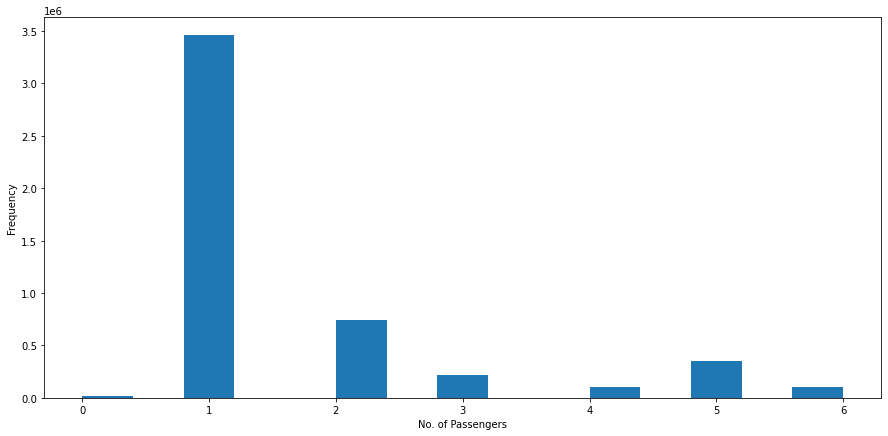

In [57]:
#passenger_count affect on fare amount. 
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

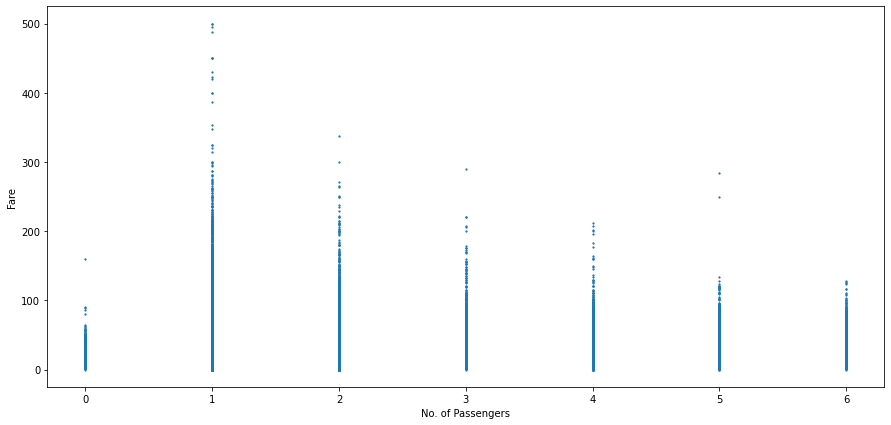

In [58]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

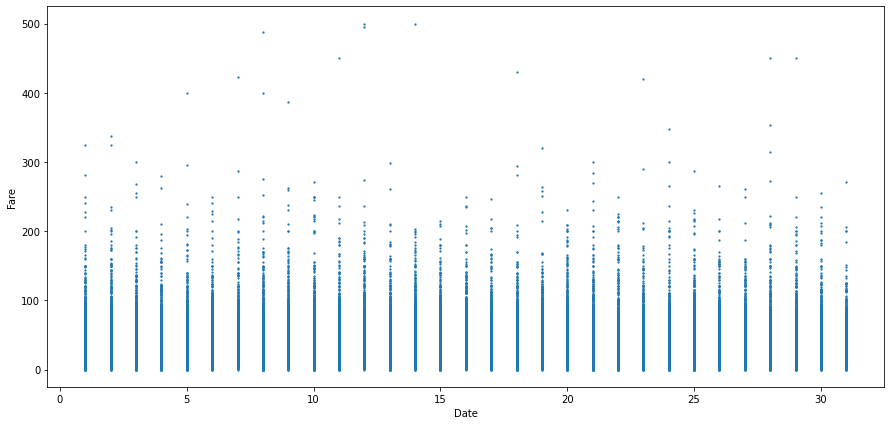

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x= df['Date'], y= df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

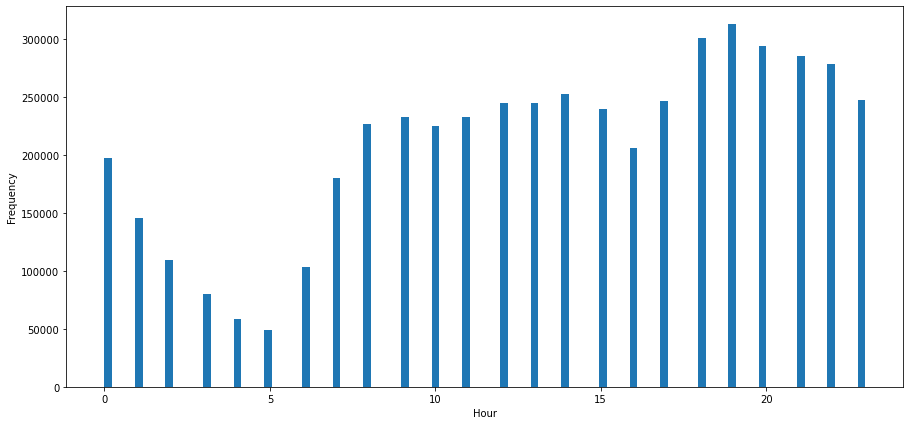

In [60]:
plt.figure(figsize=(15,7))
plt.hist(df['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

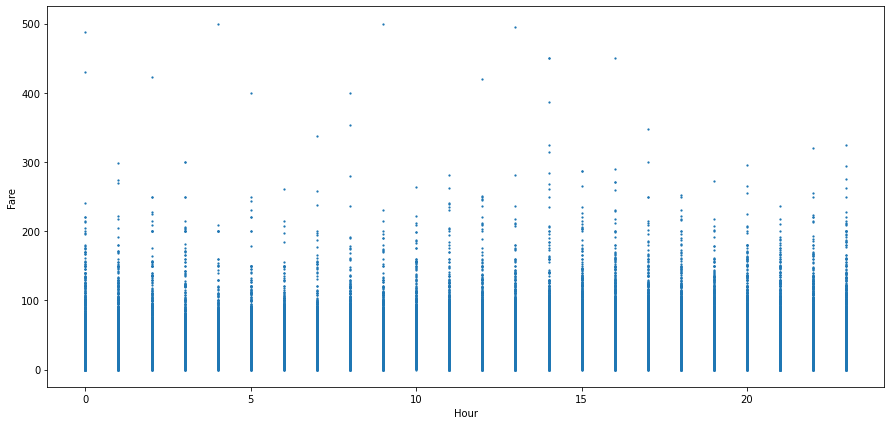

In [61]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

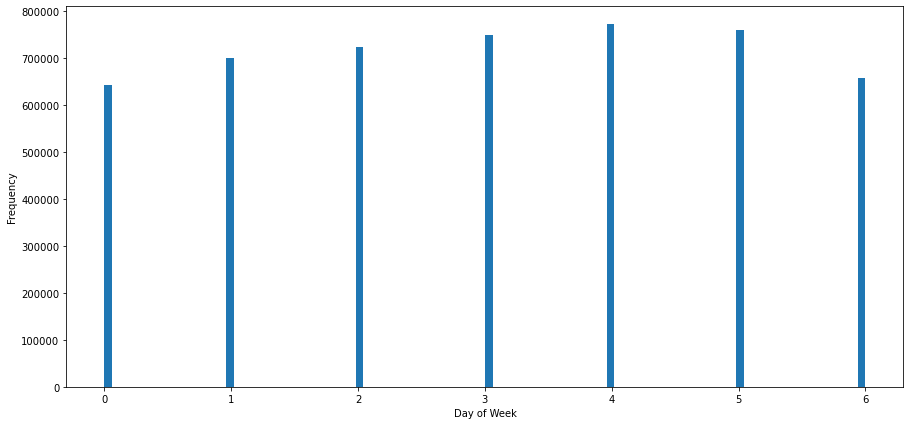

In [62]:
plt.figure(figsize=(15,7))
plt.hist(df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

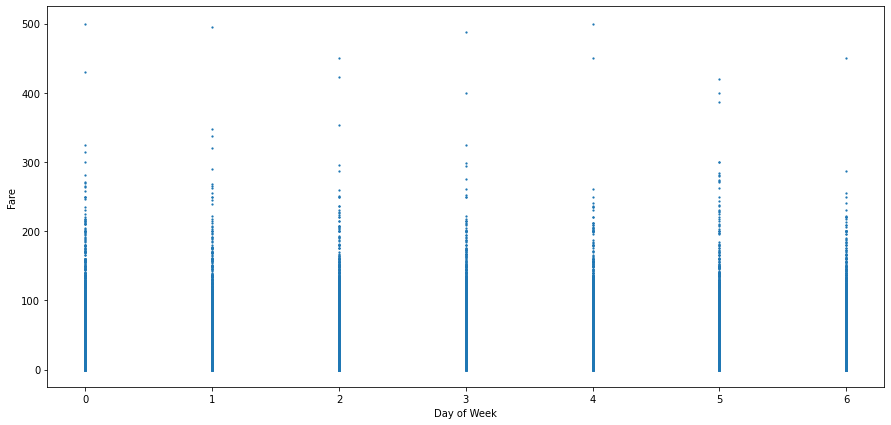

In [63]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day of Week'], y=df['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

In [64]:
df.sort_values(['H_Distance', 'fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
793922,2012-06-03 11:19:37.000000200,32.1,2012-06-03 11:19:37+00:00,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
3022078,2012-01-11 19:55:00.000000100,8.9,2012-01-11 19:55:00+00:00,-102.567300,40.751692,0.000000,0.000000,5,11062.499356,2012,1,11,2,19
4177625,2012-02-13 18:57:00.000000139,8.9,2012-02-13 18:57:00+00:00,-73.945077,89.742163,0.000000,0.000000,1,9999.614439,2012,2,13,0,18
646132,2012-02-08 20:24:00.000000173,10.5,2012-02-08 20:24:00+00:00,-89.439785,1.707957,0.000000,0.000000,1,9945.278008,2012,2,8,2,20
1806154,2012-06-14 16:09:00.000000400,63.3,2012-06-14 16:09:00+00:00,-88.959517,3.211167,0.000000,0.000000,5,9892.028646,2012,6,14,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322959,2015-03-25 07:20:55.000000300,0.0,2015-03-25 07:20:55+00:00,0.000000,0.000000,0.000000,0.000000,5,0.000000,2015,3,25,2,7
4377466,2015-01-16 14:56:36.000000400,0.0,2015-01-16 14:56:36+00:00,-73.937531,40.758289,-73.937531,40.758289,1,0.000000,2015,1,16,4,14
4383356,2013-08-17 13:55:00.000000118,0.0,2013-08-17 13:55:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.000000,2013,8,17,5,13
4819787,2015-02-18 06:47:03.000000200,0.0,2015-02-18 06:47:03+00:00,-73.937820,40.758190,-73.937820,40.758190,1,0.000000,2015,2,18,2,6


In [65]:
len(df)

4999520

In [66]:
df.loc[((df['pickup_latitude']==0) & (df['pickup_longitude']==0))&((df['dropoff_latitude']!=0) & (df['dropoff_longitude']!=0)) & (df['fare_amount']==0)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30+00:00,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0
1833544,2015-05-01 01:49:29.000000300,0.0,2015-05-01 01:49:29+00:00,0.0,0.0,-74.001106,40.752079,1,8667.465942,2015,5,1,4,1


In [67]:
df = df.drop(df.loc[((df['pickup_latitude']==0) & (df['pickup_longitude']==0))&((df['dropoff_latitude']!=0) & (df['dropoff_longitude']!=0)) & (df['fare_amount']==0)].index, axis=0)

In [68]:
df.shape

(4999518, 14)

In [69]:
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [70]:
df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11
1201970,2015-06-20 02:57:04.000000200,0.0,2015-06-20 02:57:04+00:00,-74.004311,40.742542,0.0,0.0,1,8667.536216,2015,6,20,5,2
1239525,2015-05-03 23:22:38.000000100,0.0,2015-05-03 23:22:38+00:00,-73.790138,40.643627,0.0,0.0,1,8647.756537,2015,5,3,6,23
1380855,2015-03-25 01:14:37.000000100,0.0,2015-03-25 01:14:37+00:00,-73.937645,40.758244,0.0,0.0,1,8662.338538,2015,3,25,2,1
1634619,2013-08-06 23:11:41.000000400,0.0,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.0,0.0,1,8666.220774,2013,8,6,1,23
1729974,2015-06-08 05:19:21.000000200,0.0,2015-06-08 05:19:21+00:00,-73.984421,40.728683,0.0,0.0,1,8665.605456,2015,6,8,0,5
2758542,2015-05-30 03:23:01.000000200,0.0,2015-05-30 03:23:01+00:00,-74.002304,40.708973,0.0,0.0,1,8666.683730,2015,5,30,5,3
3464075,2015-06-09 20:31:04.000000600,0.0,2015-06-09 20:31:04+00:00,-73.967117,40.766876,0.0,0.0,1,8664.955274,2015,6,9,1,20


In [71]:
#16
df = df.drop(df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)].index, axis=0)

In [72]:
df.shape

(4999502, 14)

In [73]:
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [74]:
distance_200 = df.loc[(df['H_Distance']>200)&(df['fare_amount']!=0)]

In [75]:
distance_200

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998930,2012-09-07 15:02:17.000000200,10.0,2012-09-07 15:02:17+00:00,0.000000,0.000000,-73.973797,40.777348,3,8665.722845,2012,9,7,4,15
4998949,2014-07-31 17:37:47.000000300,14.5,2014-07-31 17:37:47+00:00,0.000000,0.000000,-73.989911,40.746878,2,8666.432552,2014,7,31,3,17
4999152,2015-06-26 22:58:20.000000500,2.5,2015-06-26 22:58:20+00:00,-73.987396,40.728996,0.000000,0.000000,2,8665.858300,2015,6,26,4,22
4999449,2012-02-12 02:43:00.000000800,4.1,2012-02-12 02:43:00+00:00,-73.952715,4.066667,-73.955082,40.815045,1,4086.233203,2012,2,12,6,2


In [76]:
distance_200.shape

(10150, 14)

In [77]:
distance_200['H_Distance'] = distance_200.apply(lambda row: (row['fare_amount'] - 2.50)/1.56,axis=1)

<ipython-input-77-e9205a608235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_200['H_Distance'] = distance_200.apply(lambda row: (row['fare_amount'] - 2.50)/1.56,axis=1)


In [78]:
distance_200

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998930,2012-09-07 15:02:17.000000200,10.0,2012-09-07 15:02:17+00:00,0.000000,0.000000,-73.973797,40.777348,3,4.807692,2012,9,7,4,15
4998949,2014-07-31 17:37:47.000000300,14.5,2014-07-31 17:37:47+00:00,0.000000,0.000000,-73.989911,40.746878,2,7.692308,2014,7,31,3,17
4999152,2015-06-26 22:58:20.000000500,2.5,2015-06-26 22:58:20+00:00,-73.987396,40.728996,0.000000,0.000000,2,0.000000,2015,6,26,4,22
4999449,2012-02-12 02:43:00.000000800,4.1,2012-02-12 02:43:00+00:00,-73.952715,4.066667,-73.955082,40.815045,1,1.025641,2012,2,12,6,2


In [79]:
df.update(distance_200)

In [80]:
df.shape

(4999502, 14)

In [81]:
df[df['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999858,2013-10-19 22:05:23.000000100,7.0,2013-10-19 22:05:23+00:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2013.0,10.0,19.0,5.0,22.0
4999895,2010-12-28 17:53:00.000000200,16.5,2010-12-28 17:53:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2010.0,12.0,28.0,1.0,17.0
4999906,2011-08-09 02:51:00.000000160,6.1,2011-08-09 02:51:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,8.0,9.0,1.0,2.0
4999908,2012-10-09 07:49:00.000000119,6.5,2012-10-09 07:49:00+00:00,-73.985967,40.757045,-73.985967,40.757045,1.0,0.0,2012.0,10.0,9.0,1.0,7.0


In [82]:
df[(df['H_Distance']==0)&(df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0
1221438,2015-02-02 21:58:28.000000300,0.0,2015-02-02 21:58:28+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2015.0,2.0,2.0,0.0,21.0
1598058,2013-08-06 11:12:00.000000480,0.0,2013-08-06 11:12:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,6.0,1.0,11.0
1662545,2010-03-13 02:39:29.000000100,0.0,2010-03-13 02:39:29+00:00,-74.035278,40.738683,-74.035278,40.738683,2.0,0.0,2010.0,3.0,13.0,5.0,2.0
2214498,2010-02-03 11:44:07.000000200,0.0,2010-02-03 11:44:07+00:00,-74.014147,40.710546,-74.014147,40.710546,1.0,0.0,2010.0,2.0,3.0,2.0,11.0
2329503,2015-02-19 09:43:11.000000700,0.0,2015-02-19 09:43:11+00:00,-73.953857,40.813251,-73.953857,40.813251,1.0,0.0,2015.0,2.0,19.0,3.0,9.0
2581417,2015-05-07 19:12:43.000000500,0.0,2015-05-07 19:12:43+00:00,-73.913727,40.779018,-73.913727,40.779018,1.0,0.0,2015.0,5.0,7.0,3.0,19.0


In [83]:
#22
df = df.drop(df[(df['H_Distance']==0)&(df['fare_amount']==0)].index, axis = 0)

In [84]:
rush_hour = df.loc[(((df['Hour']>=6)&(df['Hour']<=20)) & ((df['Day of Week']>=1) & (df['Day of Week']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,21.0,2.0,14.0
1112195,2015-03-25 14:55:38.000000200,1.60,2015-03-25 14:55:38+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2015.0,3.0,25.0,2.0,14.0
1215355,2015-05-29 18:15:27.000000600,2.00,2015-05-29 18:15:27+00:00,-73.903214,40.747318,-73.903214,40.747318,1.0,0.0,2015.0,5.0,29.0,4.0,18.0
2097377,2013-08-30 15:11:00.000000143,0.50,2013-08-30 15:11:00+00:00,-121.340000,38.903350,-121.340000,38.903350,1.0,0.0,2013.0,8.0,30.0,4.0,15.0
2322071,2010-02-25 12:44:00.000000125,1.25,2010-02-25 12:44:00+00:00,-73.937722,40.758318,-73.937722,40.758318,5.0,0.0,2010.0,2.0,25.0,3.0,12.0
2949904,2015-01-22 13:34:00.000000300,2.00,2015-01-22 13:34:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,22.0,3.0,13.0
3010346,2015-01-23 08:50:38.000000600,0.01,2015-01-23 08:50:38+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,23.0,4.0,8.0
4112515,2015-04-15 20:12:10.000000500,0.01,2015-04-15 20:12:10+00:00,-73.994553,40.750240,-73.994553,40.750240,1.0,0.0,2015.0,4.0,15.0,2.0,20.0
4920415,2013-08-09 18:39:00.000000201,1.50,2013-08-09 18:39:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,8.0,9.0,4.0,18.0


In [85]:
#10
df = df.drop(rush_hour.index, axis = 0)

In [86]:
df.shape

(4999470, 14)

In [87]:
non_rush_hour = df.loc[(((df['Hour']<6)|(df['Hour']>20)) & ((df['Day of Week']>=1)&(df['Day of Week']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0))]

In [88]:
print(Counter(non_rush_hour['Hour']))
print(Counter(non_rush_hour['Day of Week']))

Counter({21.0: 212, 22.0: 191, 23.0: 187, 0.0: 159, 5.0: 151, 1.0: 144, 3.0: 110, 4.0: 100, 2.0: 96})
Counter({4.0: 315, 5.0: 292, 3.0: 278, 2.0: 253, 1.0: 212})


In [89]:
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990911,2011-07-22 23:25:11.000000200,2.5,2011-07-22 23:25:11+00:00,-73.673867,41.005107,-73.673867,41.005107,1.0,0.0,2011.0,7.0,22.0,4.0,23.0
4991983,2010-05-28 21:48:00.000000171,2.5,2010-05-28 21:48:00+00:00,0.000000,0.000000,-73.970350,40.752283,1.0,0.0,2010.0,5.0,28.0,4.0,21.0
4997423,2015-06-24 01:38:48.000000400,2.5,2015-06-24 01:38:48+00:00,0.000000,0.000000,-73.989342,40.769291,1.0,0.0,2015.0,6.0,24.0,2.0,1.0
4998691,2015-04-24 05:45:52.000000100,2.5,2015-04-24 05:45:52+00:00,0.000000,0.000000,-74.000397,40.614948,1.0,0.0,2015.0,4.0,24.0,4.0,5.0


In [90]:
weekend = df.loc[((df['Day of Week']==0) | (df['Day of Week']==6)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0)]
weekend

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00+00:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48+00:00,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980084,2013-08-26 12:42:00.000000149,2.5,2013-08-26 12:42:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,26.0,0.0,12.0
4989237,2013-01-06 22:36:13.000000100,2.5,2013-01-06 22:36:13+00:00,-73.776824,40.645284,-73.776824,40.645284,1.0,0.0,2013.0,1.0,6.0,6.0,22.0
4992784,2014-02-24 12:47:00.000000690,2.5,2014-02-24 12:47:00+00:00,-73.976382,40.744357,-73.976382,40.744357,5.0,0.0,2014.0,2.0,24.0,0.0,12.0
4996531,2012-05-14 22:29:00.000000225,2.5,2012-05-14 22:29:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,5.0,14.0,0.0,22.0


In [91]:
#Fare is 0, but Distance is not 0.
a = df.loc[(df['H_Distance']!=0) & (df['fare_amount']==0)]
a

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,5.0,15.0,4.0,21.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29+00:00,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,6.0,29.0,6.0,16.0
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39+00:00,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,4.0,15.0,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832825,2015-05-09 00:04:06.000000400,0.0,2015-05-09 00:04:06+00:00,-74.042007,40.902718,-74.041847,40.902481,1.0,0.029546,2015.0,5.0,9.0,5.0,0.0
4845569,2015-03-20 08:11:33.000000200,0.0,2015-03-20 08:11:33+00:00,-73.902046,40.764175,-73.902077,40.764149,1.0,0.003927,2015.0,3.0,20.0,4.0,8.0
4886538,2015-06-24 13:21:20.000000300,0.0,2015-06-24 13:21:20+00:00,-73.925255,40.643238,-73.925995,40.638889,1.0,0.487574,2015.0,6.0,24.0,2.0,13.0
4942824,2013-08-20 13:54:39.000000500,0.0,2013-08-20 13:54:39+00:00,-74.002551,40.733974,-74.002555,40.733975,6.0,0.000355,2013.0,8.0,20.0,1.0,13.0


In [92]:
len(a)

92

In [93]:
a.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
3614406,2015-05-12 08:28:24.000000300,0.0,2015-05-12 08:28:24+00:00,-73.820679,40.665684,-74.181442,40.687679,1.0,30.521392,2015.0,5.0,12.0,1.0,8.0
1107618,2015-05-31 01:52:15.000000200,0.0,2015-05-31 01:52:15+00:00,-73.997482,40.758915,-74.144936,40.946930,4.0,24.308001,2015.0,5.0,31.0,6.0,1.0
3763201,2010-03-05 21:43:42.000000200,0.0,2010-03-05 21:43:42+00:00,-73.786049,40.641929,-73.981236,40.782779,4.0,22.714278,2010.0,3.0,5.0,4.0,21.0
1902135,2010-03-08 20:23:36.000000200,0.0,2010-03-08 20:23:36+00:00,-73.786727,40.640482,-73.979946,40.762910,5.0,21.227931,2010.0,3.0,8.0,0.0,20.0
1614540,2010-03-15 08:10:44.000000100,0.0,2010-03-15 08:10:44+00:00,-73.781774,40.644808,-73.955025,40.773615,1.0,20.454613,2010.0,3.0,15.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00+00:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
2771692,2015-05-31 04:40:53.000000100,0.0,2015-05-31 04:40:53+00:00,-73.896584,40.752499,-73.896584,40.752502,1.0,0.000424,2015.0,5.0,31.0,6.0,4.0
495273,2015-05-26 12:28:03.000000300,0.0,2015-05-26 12:28:03+00:00,-73.986473,40.721909,-73.986473,40.721905,1.0,0.000424,2015.0,5.0,26.0,1.0,12.0
670254,2015-02-22 19:26:37.000000500,0.0,2015-02-22 19:26:37+00:00,-73.994370,40.750725,-73.994370,40.750721,1.0,0.000424,2015.0,2.0,22.0,6.0,19.0


In [94]:
a['fare_amount'] = a.apply(lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1)

<ipython-input-94-ff540b2d7190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['fare_amount'] = a.apply(lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1)


In [95]:
a['fare_amount']

10002      7.468230
27891      2.501660
47302      2.528736
175352     2.514421
211455     2.509022
             ...   
4832825    2.546091
4845569    2.506126
4886538    3.260616
4942824    2.500554
4982406    3.157398
Name: fare_amount, Length: 92, dtype: float64

In [96]:
df.update(a)

In [97]:
#Fare is not 0, but Distance is 0
b=df.loc[(df['H_Distance']==0) & (df['fare_amount']!=0)]
b

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999858,2013-10-19 22:05:23.000000100,7.0,2013-10-19 22:05:23+00:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2013.0,10.0,19.0,5.0,22.0
4999895,2010-12-28 17:53:00.000000200,16.5,2010-12-28 17:53:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2010.0,12.0,28.0,1.0,17.0
4999906,2011-08-09 02:51:00.000000160,6.1,2011-08-09 02:51:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,8.0,9.0,1.0,2.0
4999908,2012-10-09 07:49:00.000000119,6.5,2012-10-09 07:49:00+00:00,-73.985967,40.757045,-73.985967,40.757045,1.0,0.0,2012.0,10.0,9.0,1.0,7.0


In [98]:
b.loc[(b['fare_amount']<=3.0)&(b['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2013.0,12.0,8.0,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997423,2015-06-24 01:38:48.000000400,2.5,2015-06-24 01:38:48+00:00,0.000000,0.000000,-73.989342,40.769291,1.0,0.0,2015.0,6.0,24.0,2.0,1.0
4997430,2011-11-25 12:19:00.000000110,2.9,2011-11-25 12:19:00+00:00,-73.987855,40.721295,-73.987855,40.721295,1.0,0.0,2011.0,11.0,25.0,4.0,12.0
4998545,2009-10-31 15:16:04.000000300,2.5,2009-10-31 15:16:04+00:00,-73.794654,40.656458,-73.794654,40.656458,1.0,0.0,2009.0,10.0,31.0,5.0,15.0
4998691,2015-04-24 05:45:52.000000100,2.5,2015-04-24 05:45:52+00:00,0.000000,0.000000,-74.000397,40.614948,1.0,0.0,2015.0,4.0,24.0,4.0,5.0


In [99]:
b.loc[(b['fare_amount']>3.0)&(b['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999858,2013-10-19 22:05:23.000000100,7.0,2013-10-19 22:05:23+00:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2013.0,10.0,19.0,5.0,22.0
4999895,2010-12-28 17:53:00.000000200,16.5,2010-12-28 17:53:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2010.0,12.0,28.0,1.0,17.0
4999906,2011-08-09 02:51:00.000000160,6.1,2011-08-09 02:51:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,8.0,9.0,1.0,2.0
4999908,2012-10-09 07:49:00.000000119,6.5,2012-10-09 07:49:00+00:00,-73.985967,40.757045,-73.985967,40.757045,1.0,0.0,2012.0,10.0,9.0,1.0,7.0


In [100]:
b_sub = b.loc[(b['fare_amount']>3.0)&(b['H_Distance']==0)]

In [101]:
len(b_sub)

136283

In [102]:
b_sub['H_Distance'] = b_sub.apply(lambda row: ((row['fare_amount']-2.50)/1.56), axis=1)

<ipython-input-102-b4231eeacc15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_sub['H_Distance'] = b_sub.apply(lambda row: ((row['fare_amount']-2.50)/1.56), axis=1)


In [103]:
df.update(b_sub)

In [104]:
df.shape

(4999470, 14)

In [105]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0


# Visualization 

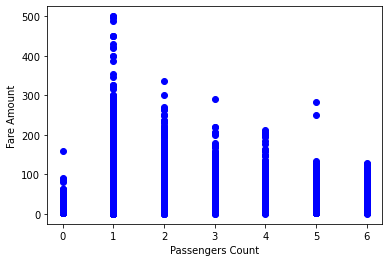

In [106]:
# Fare amount is more when passengers count is 1
plt.scatter(df.passenger_count, df.fare_amount,  color='blue')
plt.xlabel("Passengers Count")
plt.ylabel("Fare Amount")
plt.show()

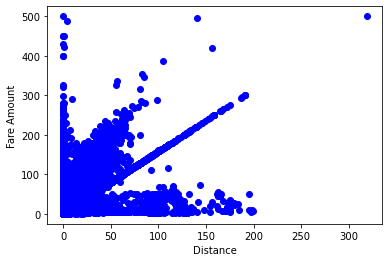

In [107]:
# distance plays crucial role in fare_amount
plt.scatter(df.H_Distance, df.fare_amount,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.show()

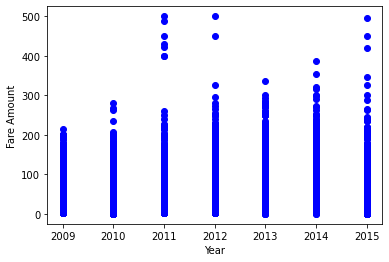

In [108]:
plt.scatter(df.Year, df.fare_amount,  color='blue')
plt.xlabel("Year")
plt.ylabel("Fare Amount")
plt.show()

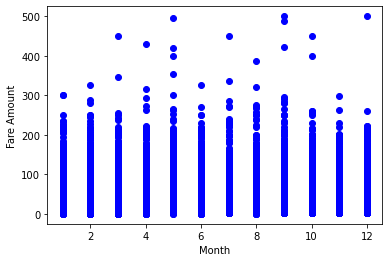

In [109]:
# May and september had highest fare amounts
plt.scatter(df.Month, df.fare_amount,  color='blue')
plt.xlabel("Month")
plt.ylabel("Fare Amount")
plt.show()

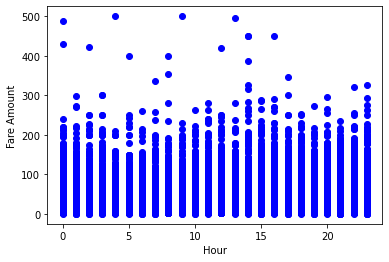

In [110]:
plt.scatter(df.Hour, df.fare_amount,  color='blue')
plt.xlabel("Hour")
plt.ylabel("Fare Amount")
plt.show()

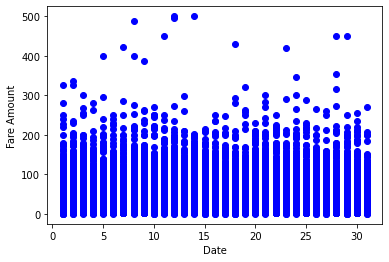

In [111]:
# 7-15th of the month has highest fare amount, but its almost uniform
plt.scatter(df.Date, df.fare_amount,  color='blue')
plt.xlabel("Date")
plt.ylabel("Fare Amount")
plt.show()

# Modelling

In [112]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [113]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [114]:
df = df.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [115]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [116]:
x_train = df.iloc[:,df.columns!='fare_amount']
y_train = df['fare_amount'].values
x_test = test

In [117]:
x_train.shape

(4999470, 11)

In [118]:
x_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [119]:
y_train.shape

(4999470,)

In [120]:
x_test.shape

(9914, 11)

In [121]:
x_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

## Multiple Linear Regression 

In [122]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = df[["passenger_count", "H_Distance"]]
regr.fit (x, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [0.0651223  1.72532015]


In [123]:
xt = test[["passenger_count", "H_Distance"]]
y_hat= regr.predict(xt)
y_hat


array([ 9.32536658,  9.50151025,  6.384331  , ..., 38.74105194,
       20.03779649,  7.67991296])

In [124]:
submission = pd.read_csv(r'C:\Users\123sa\Downloads\sample_submission.csv')
submission['fare_amount'] = y_hat
submission.to_csv('submission_1.csv', index=False)
submission.head(5)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.325367
1,2015-01-27 13:08:24.0000003,9.501510
2,2011-10-08 11:53:44.0000002,6.384331
3,2012-12-01 21:12:12.0000002,8.700409
4,2012-12-01 21:12:12.0000003,14.611819


### Score is 5.60714 not useful

# Polynomial Regression

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [126]:
df2 = df.iloc[:50000,:]

In [127]:
x3_train = df2.iloc[:,df.columns!='fare_amount']
y3_train = df2['fare_amount'].values
x_test = test

In [128]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x3_train)
train_x_poly

array([[  1.      , -73.844311,  40.721319, ...,   0.      ,   0.      ,
        289.      ],
       [  1.      , -74.016048,  40.711303, ...,   1.      ,  16.      ,
        256.      ],
       [  1.      , -73.982738,  40.76127 , ...,   9.      ,   0.      ,
          0.      ],
       ...,
       [  1.      , -74.000349,  40.720742, ...,  16.      ,  88.      ,
        484.      ],
       [  1.      , -73.967658,  40.765769, ...,   1.      ,  14.      ,
        196.      ],
       [  1.      ,   0.      ,   0.      , ...,   9.      ,  36.      ,
        144.      ]])

In [129]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y3_train)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [-2.70836947e-06 -2.88918646e+03 -5.27205118e+03 -3.92168492e+02
 -6.99813930e+02  1.30697356e+01 -2.85042367e+02 -2.72573740e+02
 -3.82186558e+01  2.75054820e+00  3.05898483e+01  7.02479660e+00
 -1.41242482e-01 -2.91693466e-02  1.33562211e+00  2.42955895e+00
 -1.57252631e-02 -2.91676338e-02  1.43162171e+00 -9.43832796e-02
  1.31901649e-02  4.41121313e-02 -2.21777097e-03  1.18777410e-01
  1.65586413e+00  3.01901338e+00 -1.49325201e-02 -4.98671451e-02
  2.61831482e+00 -1.69063785e-01  2.42108223e-02  8.33502676e-02
 -5.32513611e-03 -1.06982424e-02 -1.03119226e-02 -3.29508075e-02
  7.51600005e-03  2.10219886e-01  8.38883473e-02 -1.38371330e-02
 -1.29182815e-02  2.31361841e-03 -4.47598647e-01 -7.37131753e-02
  1.93580575e-02  3.84979140e-01  1.52578071e-01 -2.51664488e-02
 -2.74470552e-02  5.87911529e-03 -7.74682312e-02  2.17763700e-04
 -6.22682064e-03 -9.24340514e-04  1.37986036e-03 -1.10438888e-02
 -8.04350959e-04 -1.73037563e-02  1.42663670e-01  8.01124869e-03
  3.254637

In [157]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)


In [158]:
submission = pd.read_csv(r'C:\Users\123sa\Downloads\sample_submission.csv')
submission['fare_amount'] = test_y_
submission.to_csv('Polynomial_regressor.csv', index=False)
submission.head(5)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.090277
1,2015-01-27 13:08:24.0000003,10.496078
2,2011-10-08 11:53:44.0000002,5.292574
3,2012-12-01 21:12:12.0000002,8.153807
4,2012-12-01 21:12:12.0000003,16.868029


# Score is 4.075

## KNN-Regressor

In [130]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x1_train = scalar.transform(x_train)
x1_test = scalar.transform(x_test)

In [131]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x1_train, y_train)
neigh_predict = neigh.predict(x1_test)

In [132]:
submission = pd.read_csv(r'C:\Users\123sa\Downloads\sample_submission.csv')
submission['fare_amount'] = neigh_predict
submission.to_csv('KNN_regressor.csv', index=False)
submission.head(5)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.90
1,2015-01-27 13:08:24.0000003,7.90
2,2011-10-08 11:53:44.0000002,4.74
3,2012-12-01 21:12:12.0000002,8.95
4,2012-12-01 21:12:12.0000003,16.05


### Score is 4.06306

## Decision Tree Regressor

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_predict =dtr.predict(x_test)

In [135]:
submission = pd.read_csv(r'C:\Users\123sa\Downloads\sample_submission.csv')
submission['fare_amount'] = dtr_predict
submission.to_csv('DT_regressor.csv', index=False)
submission.head(5)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.0
1,2015-01-27 13:08:24.0000003,10.5
2,2011-10-08 11:53:44.0000002,6.9
3,2012-12-01 21:12:12.0000002,6.0
4,2012-12-01 21:12:12.0000003,15.5


## Score is 4.50113


## Random Forest regressor

In [136]:
df1 = df.iloc[:200000,:]

In [137]:
x2_train = df1.iloc[:,df.columns!='fare_amount']
y2_train = df1['fare_amount'].values
x_test = test

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x2_train, y2_train)
rf_predict = rf.predict(x_test)

In [139]:
submission = pd.read_csv(r'C:\Users\123sa\Downloads\sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('RF_regressor.csv', index=False)
submission.head(5)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.435
1,2015-01-27 13:08:24.0000003,10.705
2,2011-10-08 11:53:44.0000002,4.548
3,2012-12-01 21:12:12.0000002,9.044
4,2012-12-01 21:12:12.0000003,15.369


## Score is 3.53203


# BOOSTING USING LGBM

In [140]:
!pip install lightgbm

In [141]:
import lightgbm as lgbm

In [142]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [143]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

(9914,)

In [144]:
train_set = lgbm.Dataset(x2_train, y2_train, silent=True)
train_set

In [145]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

D:\Anaconda path\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: reg_aplha
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: reg_aplha
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014306 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [146]:
print(model)

In [147]:
pred_test_y = model.predict(x_test, num_iteration = model.best_iteration)

In [148]:
print(pred_test_y)

[10.57050344 10.75929581  4.77940551 ... 54.00995444 21.03142642
  6.81343173]


In [149]:
submission['fare_amount'] = pred_test_y
submission.to_csv('submission_LGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.570503
1,2015-01-27 13:08:24.0000003,10.759296
2,2011-10-08 11:53:44.0000002,4.779406
3,2012-12-01 21:12:12.0000002,8.454006
4,2012-12-01 21:12:12.0000003,15.080218
5,2012-12-01 21:12:12.0000005,11.111174
6,2011-10-06 12:10:20.0000001,5.175701
7,2011-10-06 12:10:20.0000003,49.597648
8,2011-10-06 12:10:20.0000002,12.470239
9,2014-02-18 15:22:20.0000002,6.867495


# Score is 3.50603

# BOOSTING USING XGBM

In [150]:
import xgboost as xgb 

In [151]:
dtrain = xgb.DMatrix(x2_train, label=y2_train)
dtest = xgb.DMatrix(x_test)

In [152]:
dtrain


In [153]:
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [154]:
xb = xgb.train(params, dtrain, num_rounds)

[01:52:41] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:52:41] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [155]:
y_pred_xgb = xb.predict(dtest)
print(y_pred_xgb)

[ 9.641372   9.87606    4.7745004 ... 50.487423  19.276993   6.2190576]


In [156]:
submission['fare_amount'] = y_pred_xgb
submission.to_csv('submission_XGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.641372
1,2015-01-27 13:08:24.0000003,9.876060
2,2011-10-08 11:53:44.0000002,4.774500
3,2012-12-01 21:12:12.0000002,7.487780
4,2012-12-01 21:12:12.0000003,14.322021
5,2012-12-01 21:12:12.0000005,10.038181
6,2011-10-06 12:10:20.0000001,4.991819
7,2011-10-06 12:10:20.0000003,44.328754
8,2011-10-06 12:10:20.0000002,10.928054
9,2014-02-18 15:22:20.0000002,5.536252


# My score is 3.71763